In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel("../../dataset/First Experiment/Aegean/Aegean(SKG_AMS).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,flight_class,price
0,22:15:00,11:25:00,0,1,0,1,1,110,228.28
1,22:15:00,22:10:00,0,1,1,2,1,111,267.66
2,22:15:00,22:10:00,0,1,0,2,1,222,277.66
3,22:15:00,13:40:00,0,1,1,2,1,222,280.36
4,22:15:00,22:35:00,0,1,1,2,1,111,406.97


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
flight_class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17753 entries, 0 to 17752
Data columns (total 9 columns):
departure_time      17753 non-null object
arrival_time        17753 non-null object
days_before         17753 non-null int64
day_of_week         17753 non-null int64
num_of_luggage      17753 non-null int64
num_of_stops        17753 non-null int64
overnight_flight    17753 non-null int64
flight_class        17753 non-null int64
price               17753 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 1.2+ MB


In [7]:
df.shape

(17753, 9)

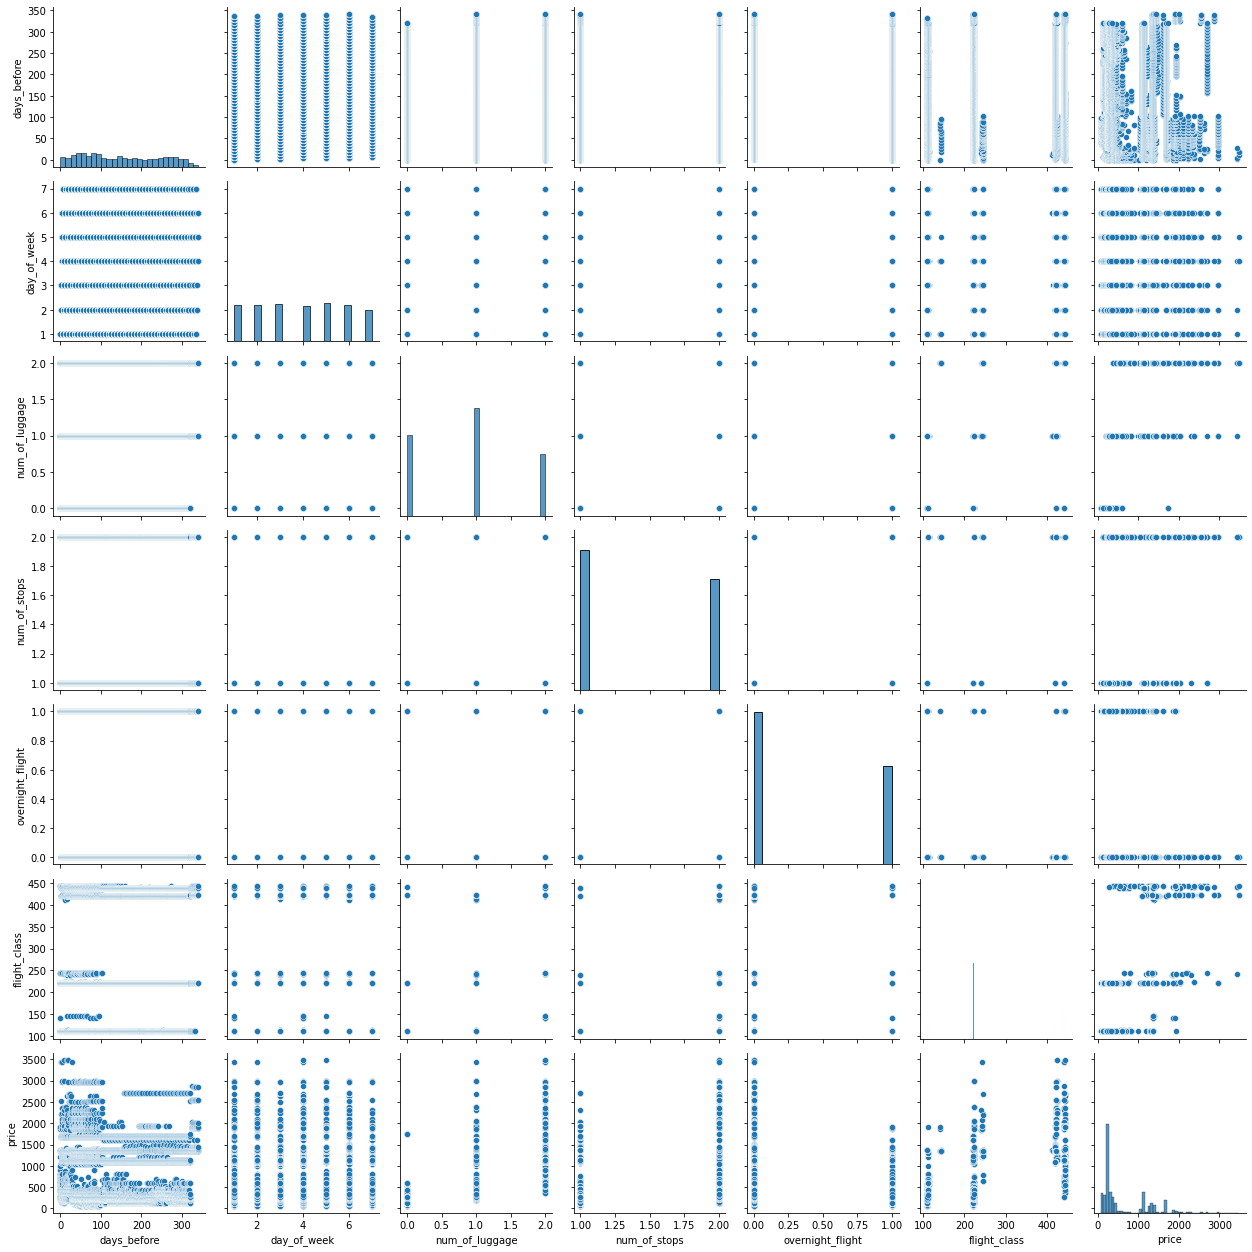

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,flight_class,price
0,1900-01-01 22:15:00,1900-01-01 11:25:00,0,1,0,1,1,110,228.28
1,1900-01-01 22:15:00,1900-01-01 22:10:00,0,1,1,2,1,111,267.66
2,1900-01-01 22:15:00,1900-01-01 22:10:00,0,1,0,2,1,222,277.66
3,1900-01-01 22:15:00,1900-01-01 13:40:00,0,1,1,2,1,222,280.36
4,1900-01-01 22:15:00,1900-01-01 22:35:00,0,1,1,2,1,111,406.97


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,flight_class,price,departuretime,arrivaltime
0,1900-01-01 22:15:00,1900-01-01 11:25:00,0,1,0,1,1,110,228.28,-2208908700000000000,-2208947700000000000
1,1900-01-01 22:15:00,1900-01-01 22:10:00,0,1,1,2,1,111,267.66,-2208908700000000000,-2208909000000000000
2,1900-01-01 22:15:00,1900-01-01 22:10:00,0,1,0,2,1,222,277.66,-2208908700000000000,-2208909000000000000
3,1900-01-01 22:15:00,1900-01-01 13:40:00,0,1,1,2,1,222,280.36,-2208908700000000000,-2208939600000000000
4,1900-01-01 22:15:00,1900-01-01 22:35:00,0,1,1,2,1,111,406.97,-2208908700000000000,-2208907500000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'flight_class',
       'price', 'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','flight_class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,flight_class,price
0,1,0,0,1,1,110,228.28
1,1,0,1,2,1,111,267.66
2,1,0,0,2,1,222,277.66
3,1,0,1,2,1,222,280.36
4,1,0,1,2,1,111,406.97


In [21]:
df.to_csv('skg_ams_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [1]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7006047491412652


In [2]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8568653202362139


In [3]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8412124191263597


In [4]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8587206247853241


In [5]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.762603753937299


In [6]:
rf_sc = r2_score(y_train, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8587201651038456


In [8]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.530592758710612


In [9]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7028872415426377


In [10]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
444/444 [==============================] - 4s 3ms/step - loss: 184505.3438 - val_loss: 226027.5938
Epoch 2/200
444/444 [==============================] - 1s 3ms/step - loss: 151867.0312 - val_loss: 113660.3516
Epoch 3/200
444/444 [==============================] - 1s 3ms/step - loss: 126542.3516 - val_loss: 105656.3047
Epoch 4/200
444/444 [==============================] - 2s 4ms/step - loss: 120231.6172 - val_loss: 175186.9219
Epoch 5/200
444/444 [==============================] - 2s 4ms/step - loss: 115688.5391 - val_loss: 91020.1016
Epoch 6/200
444/444 [==============================] - 2s 4ms/step - loss: 112461.2422 - val_loss: 91554.5234
Epoch 7/200
444/444 [==============================] - 2s 4ms/step - loss: 108411.4922 - val_loss: 90948.9297
Epoch 8/200
444/444 [==============================] - 2s 4ms/step - loss: 107488.6250 - val_loss: 103151.7891
Epoch 9/200
444/444 [==============================] - 2s 4ms/step - loss: 107142.6172 - val_loss: 90856.0312
Epoch

Epoch 149/200
444/444 [==============================] - 2s 4ms/step - loss: 81098.2500 - val_loss: 106285.6172
Epoch 150/200
444/444 [==============================] - 2s 4ms/step - loss: 79932.0234 - val_loss: 99203.1328
Epoch 151/200
444/444 [==============================] - 2s 4ms/step - loss: 80185.6484 - val_loss: 97391.7578
Epoch 152/200
444/444 [==============================] - 2s 4ms/step - loss: 80327.1484 - val_loss: 87898.6016
Epoch 153/200
444/444 [==============================] - 2s 4ms/step - loss: 80821.8906 - val_loss: 90826.3828
Epoch 154/200
444/444 [==============================] - 2s 4ms/step - loss: 78685.8594 - val_loss: 110688.8672
Epoch 155/200
444/444 [==============================] - 2s 4ms/step - loss: 81856.2578 - val_loss: 94727.8906
Epoch 156/200
444/444 [==============================] - 2s 4ms/step - loss: 78546.4375 - val_loss: 110573.6719
Epoch 157/200
444/444 [==============================] - 2s 4ms/step - loss: 79057.5469 - val_loss: 96263.382

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.7707360577366851


In [11]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
444/444 [==============================] - 2s 4ms/step - loss: 194311.1406 - val_loss: 183598.5000
Epoch 2/200
444/444 [==============================] - 2s 4ms/step - loss: 162564.8281 - val_loss: 172172.6719
Epoch 3/200
444/444 [==============================] - 2s 4ms/step - loss: 135789.2188 - val_loss: 192729.3438
Epoch 4/200
444/444 [==============================] - 2s 4ms/step - loss: 122227.1875 - val_loss: 174258.7031
Epoch 5/200
444/444 [==============================] - 2s 4ms/step - loss: 121093.1719 - val_loss: 105006.7188
Epoch 6/200
444/444 [==============================] - 2s 4ms/step - loss: 118271.9531 - val_loss: 104934.6562
Epoch 7/200
444/444 [==============================] - 2s 4ms/step - loss: 116576.8125 - val_loss: 133073.3438
Epoch 8/200
444/444 [==============================] - 2s 4ms/step - loss: 114087.5156 - val_loss: 119136.1719
Epoch 9/200
444/444 [==============================] - 2s 4ms/step - loss: 112927.2500 - val_loss: 114661.6719
E

444/444 [==============================] - 2s 4ms/step - loss: 88114.0391 - val_loss: 94024.7578
Epoch 76/200
444/444 [==============================] - 2s 4ms/step - loss: 86559.5938 - val_loss: 92503.4062
Epoch 77/200
444/444 [==============================] - 2s 4ms/step - loss: 85828.0859 - val_loss: 97740.3828
Epoch 78/200
444/444 [==============================] - 2s 4ms/step - loss: 86125.9453 - val_loss: 98684.1719
Epoch 79/200
444/444 [==============================] - 2s 4ms/step - loss: 86235.4453 - val_loss: 96096.9219
Epoch 80/200
444/444 [==============================] - 2s 4ms/step - loss: 84553.1562 - val_loss: 92306.8281
Epoch 81/200
444/444 [==============================] - 2s 4ms/step - loss: 82783.5078 - val_loss: 92617.9922
Epoch 82/200
444/444 [==============================] - 2s 4ms/step - loss: 83807.1094 - val_loss: 96384.2812
Epoch 83/200
444/444 [==============================] - 2s 4ms/step - loss: 83794.8750 - val_loss: 96271.8047
Epoch 84/200
444/444 [=

444/444 [==============================] - 2s 4ms/step - loss: 77521.2656 - val_loss: 111678.2031
Epoch 150/200
444/444 [==============================] - 2s 4ms/step - loss: 77208.7891 - val_loss: 96170.3203
Epoch 151/200
444/444 [==============================] - 2s 4ms/step - loss: 74952.5469 - val_loss: 87220.0469
Epoch 152/200
444/444 [==============================] - 2s 4ms/step - loss: 73138.6562 - val_loss: 93033.0312
Epoch 153/200
444/444 [==============================] - 2s 4ms/step - loss: 75604.6094 - val_loss: 103488.3359
Epoch 154/200
444/444 [==============================] - 2s 4ms/step - loss: 76686.0703 - val_loss: 93060.5391
Epoch 155/200
444/444 [==============================] - 2s 4ms/step - loss: 76504.9688 - val_loss: 93542.7891
Epoch 156/200
444/444 [==============================] - 2s 4ms/step - loss: 76379.3750 - val_loss: 107891.3516
Epoch 157/200
444/444 [==============================] - 2s 4ms/step - loss: 74159.7734 - val_loss: 94888.7031
Epoch 158/20

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.7564861844249668


In [12]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
444/444 [==============================] - 2s 4ms/step - loss: 191234.0938 - val_loss: 197062.5000
Epoch 2/200
444/444 [==============================] - 2s 4ms/step - loss: 160783.9219 - val_loss: 180942.5781
Epoch 3/200
444/444 [==============================] - 2s 4ms/step - loss: 136104.7812 - val_loss: 118754.2266
Epoch 4/200
444/444 [==============================] - 2s 4ms/step - loss: 127675.9141 - val_loss: 125327.0234
Epoch 5/200
444/444 [==============================] - 2s 4ms/step - loss: 123284.7422 - val_loss: 95063.5078
Epoch 6/200
444/444 [==============================] - 2s 4ms/step - loss: 117440.5625 - val_loss: 117526.2188 ETA
Epoch 7/200
444/444 [==============================] - 2s 4ms/step - loss: 114112.8438 - val_loss: 108053.4453
Epoch 8/200
444/444 [==============================] - 2s 4ms/step - loss: 111181.4297 - val_loss: 101231.0391
Epoch 9/200
444/444 [==============================] - 2s 4ms/step - loss: 108974.2422 - val_loss: 89871.6406

444/444 [==============================] - 2s 4ms/step - loss: 91744.4375 - val_loss: 105652.2500
Epoch 76/200
444/444 [==============================] - 2s 4ms/step - loss: 91352.4688 - val_loss: 110767.3047
Epoch 77/200
444/444 [==============================] - 2s 4ms/step - loss: 90467.4844 - val_loss: 106195.4766
Epoch 78/200
444/444 [==============================] - 2s 4ms/step - loss: 90525.9531 - val_loss: 101839.7734
Epoch 79/200
444/444 [==============================] - 2s 4ms/step - loss: 90799.2656 - val_loss: 98217.0547
Epoch 80/200
444/444 [==============================] - 2s 4ms/step - loss: 90081.6719 - val_loss: 97396.8594
Epoch 81/200
444/444 [==============================] - 2s 4ms/step - loss: 89582.6562 - val_loss: 96882.8594
Epoch 82/200
444/444 [==============================] - 2s 4ms/step - loss: 89744.0391 - val_loss: 103010.9531
Epoch 83/200
444/444 [==============================] - 2s 4ms/step - loss: 89518.8047 - val_loss: 107634.1953
Epoch 84/200
444/

In [13]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
444/444 [==============================] - 2s 4ms/step - loss: 179550.8906 - val_loss: 158153.6406
Epoch 2/200
444/444 [==============================] - 2s 4ms/step - loss: 131260.8281 - val_loss: 92577.9766
Epoch 3/200
444/444 [==============================] - 2s 4ms/step - loss: 121242.4531 - val_loss: 115697.6953
Epoch 4/200
444/444 [==============================] - 2s 4ms/step - loss: 117733.9453 - val_loss: 120199.6250
Epoch 5/200
444/444 [==============================] - 2s 4ms/step - loss: 114670.2109 - val_loss: 87622.6797
Epoch 6/200
444/444 [==============================] - 2s 4ms/step - loss: 111204.8984 - val_loss: 112204.6016
Epoch 7/200
444/444 [==============================] - 2s 4ms/step - loss: 108476.0703 - val_loss: 102248.0625
Epoch 8/200
444/444 [==============================] - 2s 4ms/step - loss: 107337.7969 - val_loss: 91307.7969
Epoch 9/200
444/444 [==============================] - 2s 4ms/step - loss: 105655.3750 - val_loss: 95309.3281
Epoch

444/444 [==============================] - 2s 4ms/step - loss: 73535.6172 - val_loss: 115092.3906
Epoch 149/200
444/444 [==============================] - 2s 4ms/step - loss: 73723.0312 - val_loss: 88778.9453
Epoch 150/200
444/444 [==============================] - 2s 4ms/step - loss: 76541.1250 - val_loss: 101387.3281
Epoch 151/200
444/444 [==============================] - 2s 4ms/step - loss: 74950.1953 - val_loss: 126965.7344
Epoch 152/200
444/444 [==============================] - 2s 4ms/step - loss: 73296.5312 - val_loss: 118525.5938
Epoch 153/200
444/444 [==============================] - 2s 4ms/step - loss: 73764.8906 - val_loss: 104614.5312
Epoch 154/200
444/444 [==============================] - 2s 4ms/step - loss: 72978.7266 - val_loss: 116067.8672
Epoch 155/200
444/444 [==============================] - 2s 4ms/step - loss: 74527.4922 - val_loss: 88544.3359
Epoch 156/200
444/444 [==============================] - 2s 4ms/step - loss: 74225.6953 - val_loss: 85617.2812
Epoch 157

In [14]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
444/444 [==============================] - 2s 4ms/step - loss: 212323.7656 - val_loss: 167732.3438
Epoch 2/200
444/444 [==============================] - 2s 4ms/step - loss: 163268.0156 - val_loss: 176067.0625
Epoch 3/200
444/444 [==============================] - 2s 4ms/step - loss: 154035.0000 - val_loss: 199424.2500
Epoch 4/200
444/444 [==============================] - 2s 4ms/step - loss: 137339.1094 - val_loss: 105987.5625
Epoch 5/200
444/444 [==============================] - 2s 4ms/step - loss: 126537.6094 - val_loss: 160778.7031
Epoch 6/200
444/444 [==============================] - 2s 4ms/step - loss: 122891.3281 - val_loss: 115254.6250
Epoch 7/200
444/444 [==============================] - 2s 4ms/step - loss: 118676.4141 - val_loss: 147433.7344
Epoch 8/200
444/444 [==============================] - 2s 4ms/step - loss: 115741.1406 - val_loss: 144983.2031
Epoch 9/200
444/444 [==============================] - 2s 4ms/step - loss: 112689.3750 - val_loss: 166401.4062
E

444/444 [==============================] - 2s 4ms/step - loss: 77097.0000 - val_loss: 141217.7969
Epoch 148/200
444/444 [==============================] - 2s 4ms/step - loss: 77694.8984 - val_loss: 139690.9844
Epoch 149/200
444/444 [==============================] - 2s 4ms/step - loss: 76809.6641 - val_loss: 143758.7969
Epoch 150/200
444/444 [==============================] - 2s 4ms/step - loss: 77903.9609 - val_loss: 135565.9062
Epoch 151/200
444/444 [==============================] - 2s 4ms/step - loss: 77701.2109 - val_loss: 137584.2344
Epoch 152/200
444/444 [==============================] - 2s 4ms/step - loss: 77730.4219 - val_loss: 145616.8281
Epoch 153/200
444/444 [==============================] - 2s 4ms/step - loss: 77076.0391 - val_loss: 142431.1094
Epoch 154/200
444/444 [==============================] - 2s 4ms/step - loss: 77109.7734 - val_loss: 141059.1875
Epoch 155/200
444/444 [==============================] - 2s 4ms/step - loss: 79309.7656 - val_loss: 142868.0625
Epoch 

In [15]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
444/444 [==============================] - 3s 5ms/step - loss: 160955.1562 - val_loss: 112281.5000
Epoch 2/200
444/444 [==============================] - 2s 4ms/step - loss: 125456.9922 - val_loss: 102623.9219
Epoch 3/200
444/444 [==============================] - 2s 4ms/step - loss: 122176.4062 - val_loss: 148498.4531
Epoch 4/200
444/444 [==============================] - 2s 4ms/step - loss: 119250.8438 - val_loss: 98330.7109
Epoch 5/200
444/444 [==============================] - 2s 4ms/step - loss: 115480.8750 - val_loss: 110734.6641
Epoch 6/200
444/444 [==============================] - 2s 4ms/step - loss: 113147.3047 - val_loss: 100145.9688
Epoch 7/200
444/444 [==============================] - 2s 4ms/step - loss: 111309.2031 - val_loss: 105002.0391
Epoch 8/200
444/444 [==============================] - 2s 4ms/step - loss: 108646.2344 - val_loss: 85818.5391
Epoch 9/200
444/444 [==============================] - 2s 4ms/step - loss: 106437.9219 - val_loss: 94769.2734
Epoc

444/444 [==============================] - 2s 4ms/step - loss: 76378.0000 - val_loss: 111796.5703
Epoch 149/200
444/444 [==============================] - 2s 4ms/step - loss: 75050.9453 - val_loss: 104240.2578
Epoch 150/200
444/444 [==============================] - 2s 4ms/step - loss: 75773.1250 - val_loss: 97560.3672
Epoch 151/200
444/444 [==============================] - 2s 4ms/step - loss: 84061.5547 - val_loss: 105367.2891
Epoch 152/200
444/444 [==============================] - 2s 4ms/step - loss: 78323.2734 - val_loss: 132057.7344
Epoch 153/200
444/444 [==============================] - 2s 4ms/step - loss: 81340.5547 - val_loss: 93583.9531
Epoch 154/200
444/444 [==============================] - 2s 4ms/step - loss: 76627.9062 - val_loss: 102033.7656
Epoch 155/200
444/444 [==============================] - 2s 4ms/step - loss: 74947.6016 - val_loss: 116972.5703
Epoch 156/200
444/444 [==============================] - 2s 4ms/step - loss: 76543.1094 - val_loss: 139653.8594
Epoch 15

In [16]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [17]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [18]:
result

,ML Model,R2-Score
0,AdaBoost,0.701
1,Bagging,0.857
2,Gradient Boosting,0.841
3,Decision Tree,0.859
4,Random Forest,0.763
5,Extra Tree,0.859
6,SVR,0.530
7,MLP,0.703
8,VGG11,0.771
9,VGG13,0.756


# Graph

In [19]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

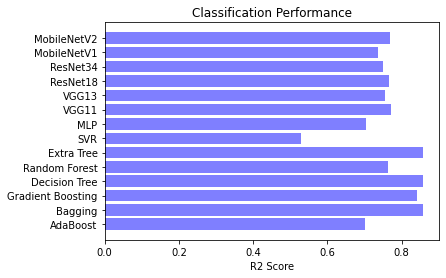

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()